# CS306: Data Analysis and Visualization

### Assignment 1
---


**Name: Pratvi Shah**


**Student ID: 201801407**

In [2]:
import seaborn as sns
import csv
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors 
import pandas as pd
from scipy import stats
from scipy.stats import multivariate_normal
import math
import random
from matplotlib import cm
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from scipy.signal import find_peaks
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## Q5

### Q5 a)

(100, 2)


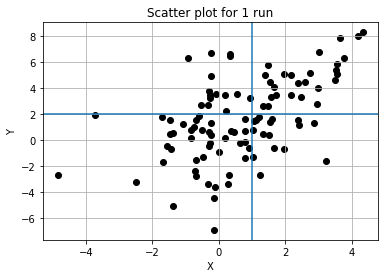

In [3]:
mean = [1,2]
var = [[4,4],[4,9]]
np.random.seed(22)
data = np.random.multivariate_normal(mean, var, 100)

print(data.shape)
plt.scatter(data[:,0],data[:,1],color='k')
plt.axhline(2)
plt.axvline(1)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter plot for 1 run')
plt.grid()

### Function for given number of runs(=runs) and N samples

In [4]:
def gen_mean_var(runs,N):
    
    sample_mean=np.zeros(2)
    sample_cov=[[0,0],[0,0]]
    sample_cov=np.array(sample_cov)
    for i in range(runs):
        #generating the random numbers for given mean and variance
        data = np.random.multivariate_normal(mean, var, N)
        
        #sum up the mean to calculate the average
        sample_mean =sample_mean + np.array([data[:,0].mean(),data[:,1].mean()])
        
        #sum up the covariance to calculate the average
        sample_cov = sample_cov + np.cov(data[:,0],data[:,1])
    
    sample_mean= sample_mean/runs #required sample mean for N samples and runs=runs
    sample_cov = sample_cov/runs  #required sample covariance for N samples and runs=runs
    return data,sample_mean,sample_cov

### Q5 b)

In [5]:
data_1,sample_mean_1,sample_cov_1=gen_mean_var(1,100)
print('Sample mean:',sample_mean_1)
print('\n\nSample covariance matrix:\n',sample_cov_1)

Sample mean: [0.80406214 2.06550656]


Sample covariance matrix:
 [[ 4.87658654  4.98429773]
 [ 4.98429773 10.71705093]]


### Q5 c)

In [6]:
data_10,sample_mean_10,sample_cov_10=gen_mean_var(10,100)
print('Sample mean:',sample_mean_10)
print('\n\nSample covariance matrix:\n',sample_cov_10)

Sample mean: [1.07206173 2.05486939]


Sample covariance matrix:
 [[4.06725384 3.76422331]
 [3.76422331 8.24512189]]


### Q5 d)

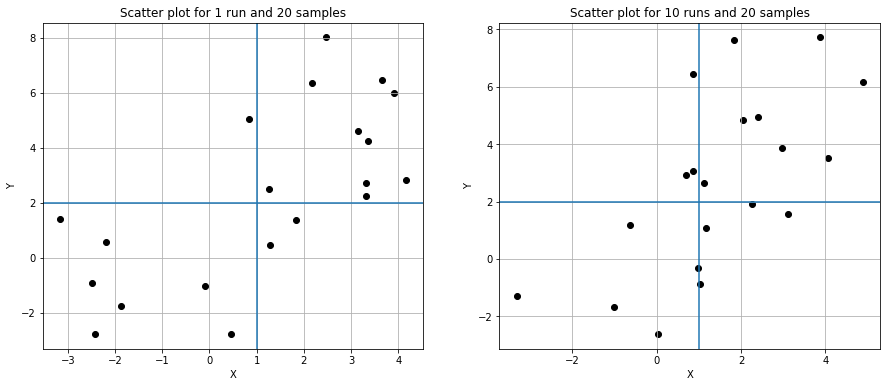

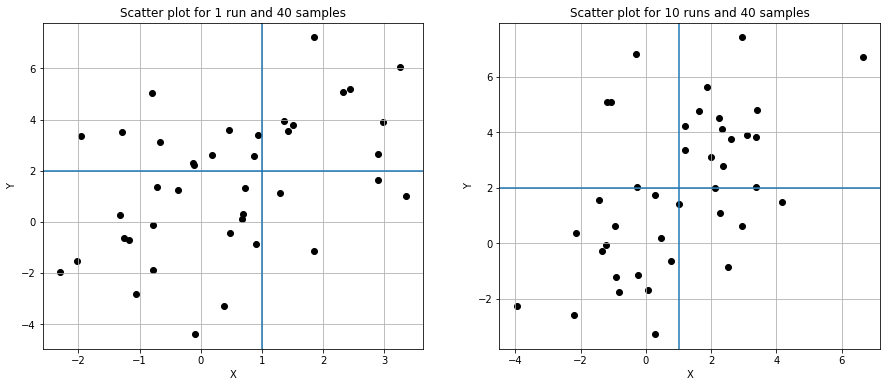

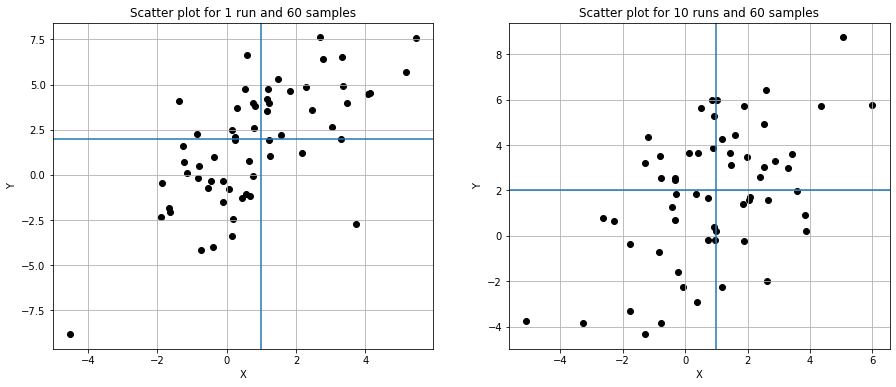

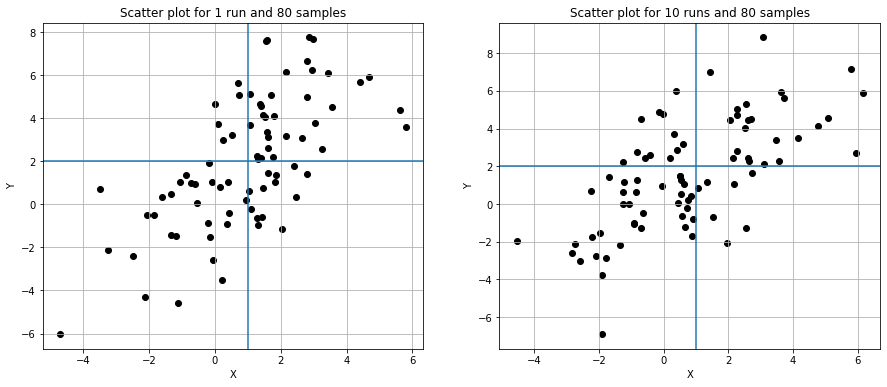

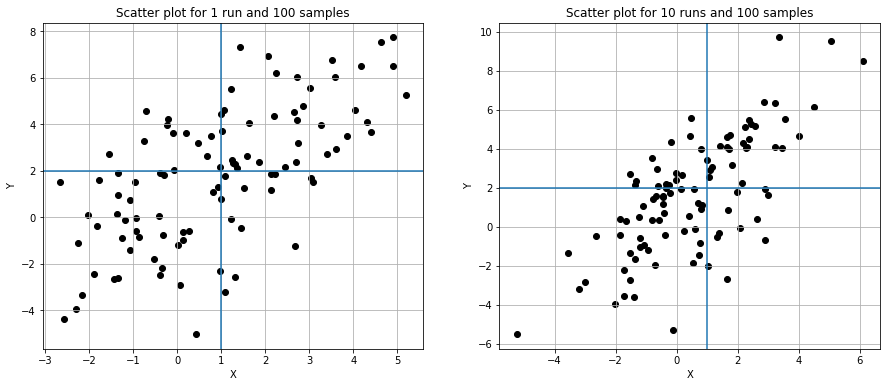

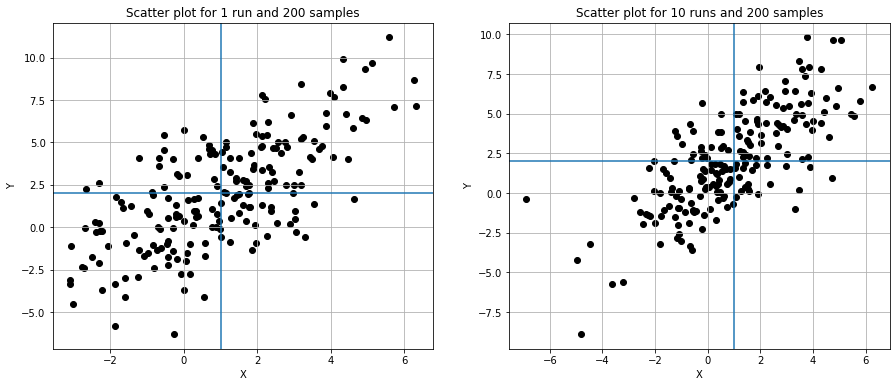

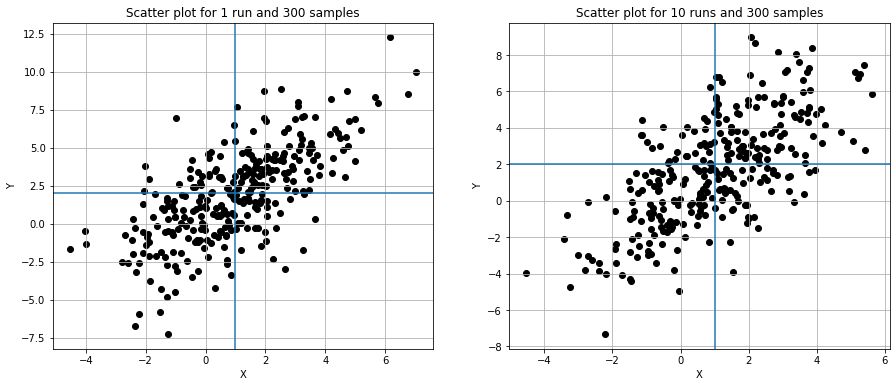

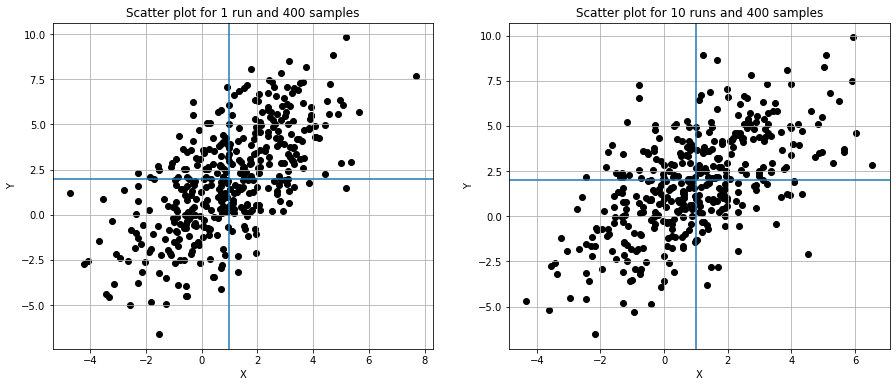

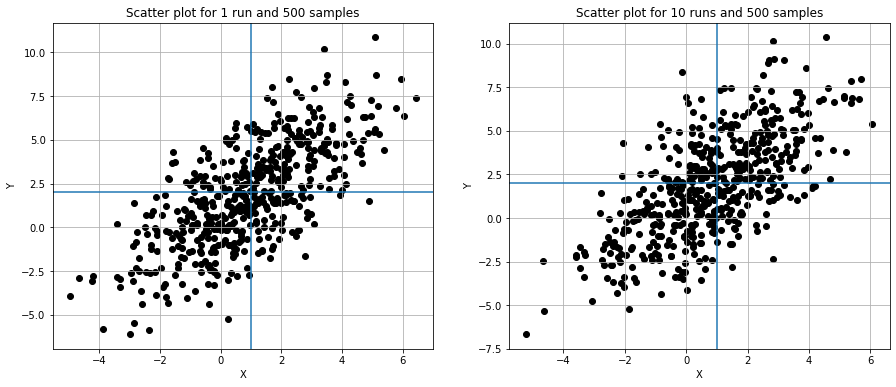

In [7]:
N=[20,40,60,80,100,200,300,400,500]
cols=['N','Mean_1','Covariance_1','Mean_10','Covariance_10']
cols2=['N','Mean_1 RMSE','Cov_1 RMSE','Mean_10 RMSE','Cov_10 RMSE']
df = pd.DataFrame(columns=cols)
err = pd.DataFrame(columns=cols2)

for n in N:
    df_list={}
    err_list={}
    fig,ax=plt.subplots(1,2,figsize=[15,6])
    temp_data,temp_mean,temp_cov = gen_mean_var(1,n)
    ax[0].scatter(temp_data[:,0],temp_data[:,1],color='k')
    ax[0].axhline(2)
    ax[0].axvline(1)
    ax[0].set_xlabel('X')
    ax[0].set_ylabel('Y')
    ax[0].set_title('Scatter plot for 1 run and '+str(n)+' samples')
    ax[0].grid(True)
    df_list[cols[0]] = n
    err_list[cols2[0]] = n
    df_list[cols[1]] = np.around(temp_mean,3)
    df_list[cols[2]] = np.around(temp_cov,3)
    err_list[cols2[1]] = np.around(mean_squared_error(mean,temp_mean),3)
    err_list[cols2[2]] = np.around(mean_squared_error(var,temp_cov),3)
    
    temp_data,temp_mean,temp_cov = gen_mean_var(10,n)
    ax[1].scatter(temp_data[:,0],temp_data[:,1],color='k')
    ax[1].axhline(2)
    ax[1].axvline(1)
    ax[1].set_xlabel('X')
    ax[1].set_ylabel('Y')
    ax[1].set_title('Scatter plot for 10 runs and '+str(n)+' samples')
    ax[1].grid(True)
    df_list[cols[3]] = np.around(temp_mean,3)
    df_list[cols[4]] = np.around(temp_cov,3)
    err_list[cols2[3]] = np.around(mean_squared_error(mean,temp_mean),3)
    err_list[cols2[4]] = np.around(mean_squared_error(var,temp_cov),3)
    
    plt.show()
    df=df.append(df_list,ignore_index=True)
    err=err.append(err_list,ignore_index=True)


**We can see from the scatter plots that as the number of samples increase the density of the points near the mean i.e., intersection of the two blue lines increase.**

### Required table 

In [8]:
df

,N,Mean_1,Covariance_1,Mean_10,Covariance_10
0,20,"[1.147, 2.273]","[[5.879, 5.326], [5.326, 10.212]]","[1.303, 2.466]","[[3.88, 3.897], [3.897, 10.201]]"
1,40,"[0.472, 1.542]","[[2.375, 1.851], [1.851, 7.167]]","[1.003, 1.981]","[[3.395, 3.581], [3.581, 9.181]]"
2,60,"[0.824, 1.687]","[[3.6, 4.145], [4.145, 10.758]]","[0.988, 1.908]","[[4.177, 4.127], [4.127, 9.076]]"
3,80,"[0.962, 1.992]","[[3.706, 3.841], [3.841, 9.111]]","[0.906, 1.883]","[[4.43, 4.608], [4.608, 9.766]]"
4,100,"[0.915, 1.786]","[[3.807, 3.705], [3.705, 8.597]]","[0.976, 1.943]","[[4.215, 4.167], [4.167, 8.866]]"
5,200,"[0.997, 1.975]","[[4.281, 4.556], [4.556, 10.193]]","[0.965, 1.981]","[[4.261, 4.349], [4.349, 9.547]]"
6,300,"[0.968, 1.895]","[[3.967, 4.192], [4.192, 9.417]]","[1.018, 1.953]","[[4.155, 4.145], [4.145, 9.044]]"
7,400,"[0.972, 1.93]","[[3.71, 3.654], [3.654, 8.613]]","[1.011, 1.996]","[[3.936, 3.894], [3.894, 8.902]]"
8,500,"[0.902, 1.835]","[[3.961, 4.096], [4.096, 8.625]]","[0.961, 1.876]","[[4.053, 4.176], [4.176, 9.304]]"


### RMSE for mean and covariance

In [9]:
err

,N,Mean_1 RMSE,Cov_1 RMSE,Mean_10 RMSE,Cov_10 RMSE
0,20.0,0.048,2.129,0.154,0.370
1,40.0,0.244,3.810,0.000,0.188
2,60.0,0.065,0.823,0.004,0.017
3,80.0,0.001,0.037,0.011,0.377
4,100.0,0.026,0.093,0.002,0.030
5,200.0,0.000,0.530,0.001,0.153
6,300.0,0.006,0.062,0.001,0.017
7,400.0,0.003,0.118,0.000,0.009
8,500.0,0.018,0.040,0.008,0.039


## Q6 ANOVA

In [10]:
def anova_table(n,runs,pp=False):
    np.random.seed(22)
    mu=60
    sigma=12
    cols=['d.o.f','sum_sq','mean_sq','F']
    inbuilt_f=[]
    inbuilt_p=[]
    f_calc=[]
    ans_335=0
    for i in range(runs):
        A=np.random.normal(mu,sigma,n)        
        B=np.random.normal(mu,sigma,n)
        C=np.random.normal(mu,sigma,n)
        mean_a=A.mean()
        mean_b=B.mean()
        mean_c=C.mean()
        mu_total=(np.sum(A) + np.sum(B) + np.sum(C))/(len(A) + len(B) + len(C))
        
        #SSE and SSB
        sse = np.sum((A-mean_a)**2) + np.sum((B-mean_b)**2) + np.sum((C-mean_c)**2)
        ssb = len(A)*(mean_a - mu_total)**2 + len(B)*(mean_b - mu_total)**2 + len(C)*(mean_c - mu_total)**2
        
        #degree of freedom
        dof_ssb= 3 - 1
        dof_sse = 3*(len(A)-1)
        
        #F calculated
        F=ssb*dof_sse/(sse*dof_ssb)
        inbuilt_f.append(stats.f_oneway(A,B,C).statistic)
        inbuilt_p.append(stats.f_oneway(A,B,C).pvalue)
        
        #Array to maintain f value for all runs
        f_calc.append(F)
        
        #For calculating F>=3.35 proportion
        if F>=3.35:
            ans_335=ans_335+1
        if runs==1 and pp==True:
            data=np.zeros([2,4])
            data[0][0]=dof_ssb
            data[0][1]=ssb
            data[0][2]=ssb/dof_ssb
            data[1][0]=dof_sse
            data[1][1]=sse
            data[1][2]=sse/dof_sse
            data[0][3]=F
            df=pd.DataFrame(data=data,columns=cols,index=['SSB','SSE'])
            print('A: ',A)
            print('\nB: ',B)
            print('\nC: ',C)
            print()
            print(df)

        
    return f_calc,inbuilt_f,inbuilt_p,ans_335/len(f_calc)

## Q6 a) 

In [11]:
f,in_f,in_p,val=anova_table(10,1,True)
print('\nCorresponding pvalue:',in_p)

A:  [58.89660096 42.43979217 72.98150015 57.12809798 54.10645037 47.97273588
 71.02585804 46.75641479 67.51792148 53.26183463]

B:  [60.34626142 57.23079375 67.05302657 69.02781095 47.29796935 72.67166897
 68.97300319 72.77611906 78.24155505 42.13676477]

C:  [82.3198787  40.81664367 52.24711665 64.04790002 72.5607447  67.54972008
 64.35670914 66.66899636 46.93740562 60.28433726]

     d.o.f       sum_sq     mean_sq         F
SSB    2.0   215.501324  107.750662  0.813697
SSE   27.0  3575.369308  132.421085  0.000000

Corresponding pvalue: [0.4537913802184059]


**We can see that pvalue remains significantly large hence, we cannot reject the null hypothesis that the samples have the same mean or belong to the same population.**

## Q6 b) anova_table is the function for evaluating the fvalues for this question

In [12]:
f2,in_f2,in_p2,val = anova_table(10,200)
print('Proportion of F values that exceed F=3.35 : ',val)

Proportion of F values that exceed F=3.35 :  0.035


## Q6 c)

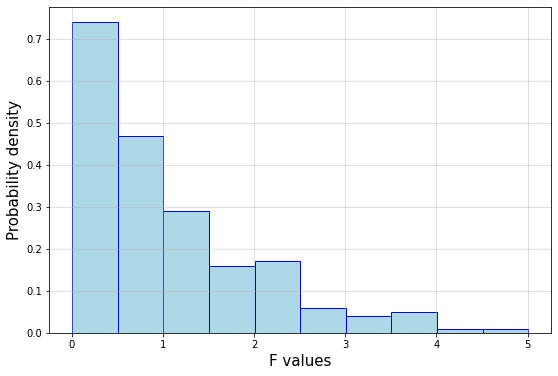

In [13]:
plt.figure(figsize=[9,6])
plt.hist(f2,color='lightblue',density=True,edgecolor='b')
plt.xlabel('F values',fontsize=15)
plt.ylabel('Probability density',fontsize=15)
plt.grid(True,alpha=0.5)
plt.show()


### Q6 d)

Proportion of F values that exceed F=3.35 :  0.075


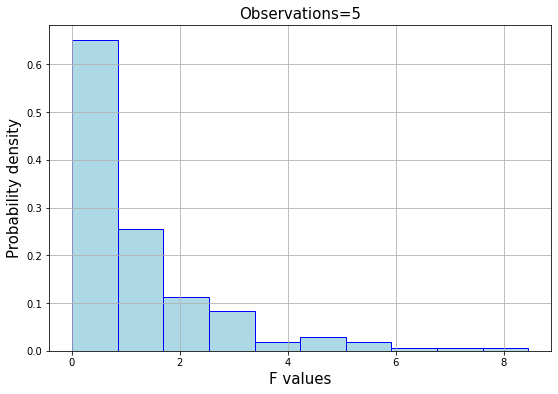

Proportion of F values that exceed F=3.35 :  0.035


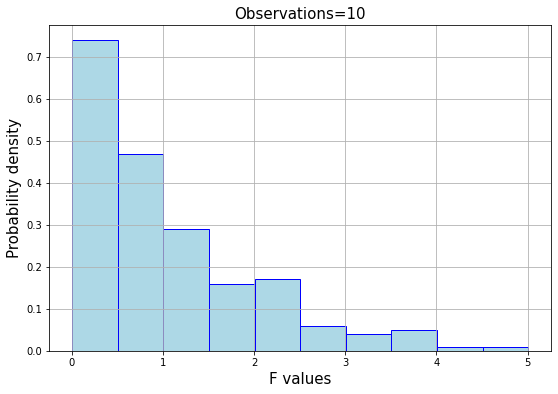

Proportion of F values that exceed F=3.35 :  0.055


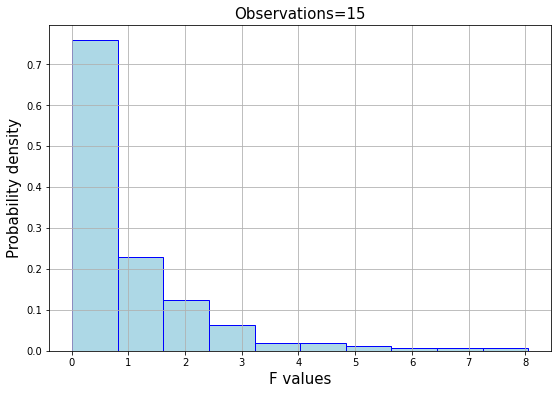

Proportion of F values that exceed F=3.35 :  0.03


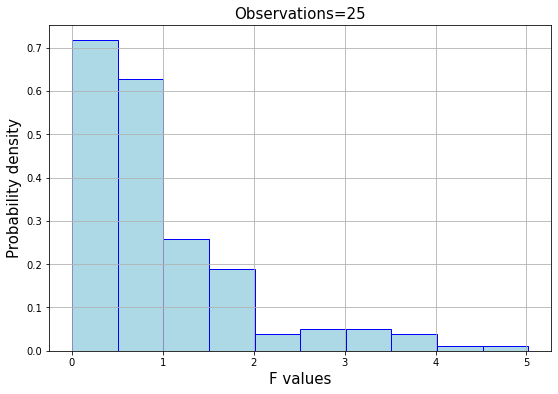

Proportion of F values that exceed F=3.35 :  0.04


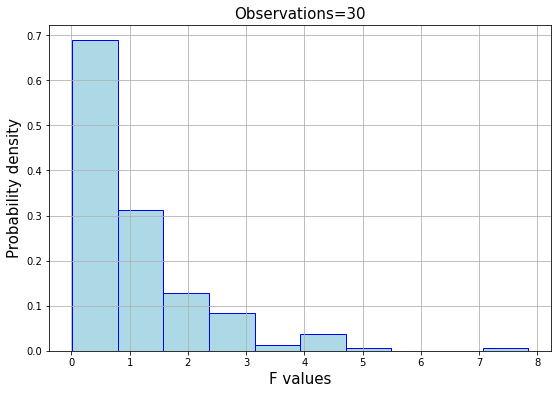

In [14]:
obs=[5,10,15,25,30]
arr_f=[[] for _ in range(len(obs))]
f_values=[]
p_values=[]
val=[]
arr_in_f=[[] for _ in range(len(obs))]
arr_in_p=[[] for _ in range(len(obs))]
for i in range(len(obs)):
    f,inF,inP,v=anova_table(obs[i],1)
    f_values.append(round(inF[0],3))
    p_values.append(round(inP[0],3))
    arr_f[i],arr_in_f[i],arr_in_p[i],v = anova_table(obs[i],200)
    val.append(v)
    print('Proportion of F values that exceed F=3.35 : ',v)
    
    plt.figure(figsize=[9,6])
    plt.hist(arr_f[i],color='lightblue',density=True,edgecolor='b')
    plt.title('Observations='+str(obs[i]),fontsize=15)
    plt.xlabel('F values',fontsize=15)
    plt.ylabel('Probability density',fontsize=15)
    plt.grid(True)
    plt.show()
q6_d=pd.DataFrame({'N':obs,'F-value':f_values,'p-value':p_values,'F-ratio':val})



In [15]:
q6_d

,N,F-value,p-value,F-ratio
0,5,0.139,0.872,0.075
1,10,0.814,0.454,0.035
2,15,0.898,0.415,0.055
3,25,0.515,0.600,0.030
4,30,0.705,0.497,0.040


## Q7

In [16]:
#To produce plots of the given data 
def initial_plots(x,name):
    plt.figure(figsize=[7,5])
    plt.plot(x,'k')
    plt.xlabel('Index',fontsize=15)
    plt.ylabel('x',fontsize=15)
    plt.title('Initial plot for '+str(name),fontsize=15)
    plt.grid(True)
    plt.show()   
    

#To calculate the auto-correlation of the data
def get_autocorrelation(x): 
    xmean = np.mean(x)
    x -= xmean
    autocorr = np.correlate(x, x,mode='full')
    n=autocorr.size
    
    #Filtering the positive part as it is symmetrical
    #Dividing by the first value after that to get autocorrelation between 0 and 1
    temp = autocorr[int(n/2):]/autocorr[int(n/2)]
    return temp

#To get the plot for auto-correlation v/s lag to notice the peaks 
def corr_plot(x,name):
    data_corr=get_autocorrelation(x)
    plt.figure(figsize=[7,5])
    plt.plot(data_corr,'k')
    plt.xlabel('Lag',fontsize=15)
    plt.ylabel('Autocorrelation',fontsize=15)
    plt.title('For understanding periodicity of '+str(name),fontsize=15)
    plt.grid(True)
    return data_corr



### Data 1

In [23]:
data=pd.read_csv('data-ass1.csv')
print(data.head())


   Unnamed: 0         x
0           1  1.017390
1           2  1.010947
2           3  1.025943
3           4  1.031407
4           5  1.027881


### Q7 a)

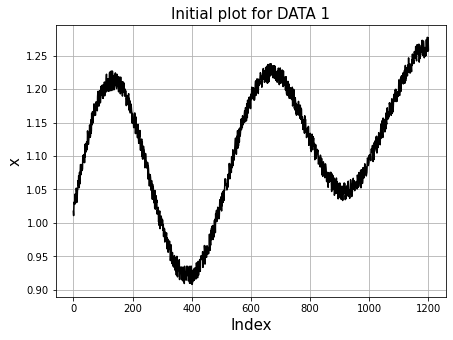

In [24]:
name='DATA 1'
x=data['x']
xnew=initial_plots(x,name)

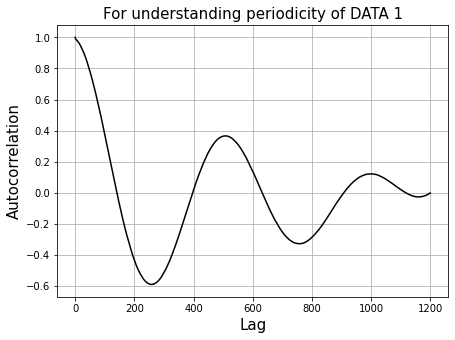

In [25]:
name='DATA 1'
data1_corr=corr_plot(x,name)

In [26]:
neg_peak=[]
pos_peak=[]
for i in range(1,len(data1_corr)-1):
    if(data1_corr[i]>0 and data1_corr[i]>data1_corr[i-1] and data1_corr[i]>data1_corr[i+1]):
        pos_peak.append(i)
    elif(data1_corr[i]<0 and data1_corr[i]<data1_corr[i-1] and data1_corr[i]<data1_corr[i+1]):
        neg_peak.append(i)

peak1=0
idx1=0
peak2=0
idx2=0
for i in range(int(len(pos_peak)/2)):
    if peak1<data1_corr[pos_peak[i]]:
        peak1=data1_corr[pos_peak[i]]
        idx1=i

for i in range(int(len(pos_peak)/2),len(pos_peak)):
    if peak2<data1_corr[pos_peak[i]]:
        peak2=data1_corr[pos_peak[i]]
        idx2=i
data1_period=pos_peak[idx2]-pos_peak[idx1]

peak4=5
peak3=5
idx3=0
idx4=0
for i in range(4):
    if peak3>data1_corr[neg_peak[i]]:
        peak3=data1_corr[neg_peak[i]]
        idx3=i
for i in range(4,len(neg_peak)):
    if peak4>data1_corr[neg_peak[i]]:
        peak4=data1_corr[neg_peak[i]]
        idx4=i
data1_period=max(neg_peak[idx4]-neg_peak[idx3],data1_period)

print('Trough:',neg_peak)
print('Crest:',pos_peak)
print('Prominent maxima:',[pos_peak[idx1],pos_peak[idx2]])
print('Prominent minima:',[neg_peak[idx3],neg_peak[idx4]])
print('Periodicity of DATA 1: ',data1_period)

Trough: [254, 257, 264, 745, 755, 758, 760, 1153, 1156, 1162]
Crest: [500, 507, 510, 513, 992, 999, 1001, 1003, 1011]
Prominent maxima: [507, 1001]
Prominent minima: [257, 755]
Periodicity of DATA 1:  498


### DATA 2

In [27]:
data2=pd.read_csv('data2-ass1.csv')
print(data2.head())


   Unnamed: 0         x
0           1  1.017390
1           2  1.010229
2           3  1.024511
3           4  1.029264
4           5  1.025033


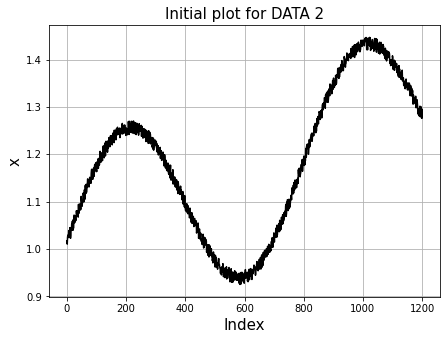

In [28]:
y=data2['x']
name='DATA 2'
ynew=initial_plots(y,name)

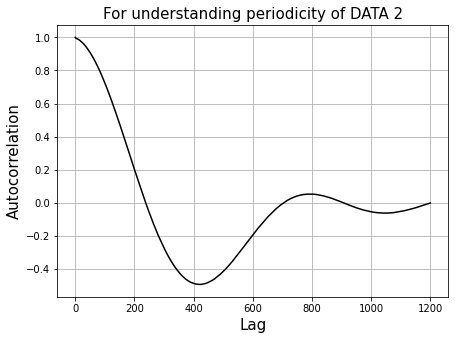

In [29]:
data2_corr=corr_plot(y,name)


In [30]:
neg_peak=[]
pos_peak=[]
for i in range(1,len(data2_corr)-1):
    if(data2_corr[i]>0 and data2_corr[i]>data2_corr[i-1] and data2_corr[i]>data2_corr[i+1]):
        pos_peak.append(i)
    elif(data2_corr[i]<0 and data2_corr[i]<data2_corr[i-1] and data2_corr[i]<data2_corr[i+1]):
        neg_peak.append(i)
print('Trough:',neg_peak)
print('Crest:',pos_peak)
# print('Peaks:',peak)
period=[]
peak1=0
idx1=0
for i in range(len(pos_peak)):
    if peak1<data2_corr[pos_peak[i]]:
        peak1=data2_corr[pos_peak[i]]
        idx1=i
data2_period=pos_peak[idx1]-0

peak2=5
peak3=5
idx3=0
idx2=0
for i in range(4):
    if peak2>data2_corr[neg_peak[i]]:
        peak2=data2_corr[neg_peak[i]]
        idx2=i
for i in range(4,len(neg_peak)):
    if peak3>data2_corr[neg_peak[i]]:
        peak3=data2_corr[neg_peak[i]]
        idx3=i
data2_period=max(neg_peak[idx3]-neg_peak[idx2],data2_period)

print('Prominent maxima:',pos_peak[idx1])
print('Prominent minima:',[neg_peak[idx2],neg_peak[idx3]])
print('Periodicity of DATA 2: ',data2_period)


Trough: [413, 417, 422, 1038, 1040, 1043, 1047, 1054, 1058]
Crest: [789, 791, 796, 801]
Prominent maxima: 796
Prominent minima: [422, 1047]
Periodicity of DATA 2:  796
